In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import random
from datetime import datetime, timedelta

C:\Users\venka\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 2246475.5000 - val_loss: 2160190.5000
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1906896.0000 - val_loss: 833376.9375
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 850167.8125 - val_loss: 486932.3750
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 541760.8750 - val_loss: 202619.3125
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 277190.6562 - val_loss: 29728.4609
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 148212.1094 - val_loss: 15142.7002
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 159908.9688 - val_loss: 16302.5342
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 144116.8281 - val_loss: 16252.6123
Epoch 9/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 127866.6406 - val_loss: 13906.8066
Epoch 10/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 111486.2031 - val_loss: 15868.7285
Epoch 11/100
200/200 ━━━━━━━━━━━

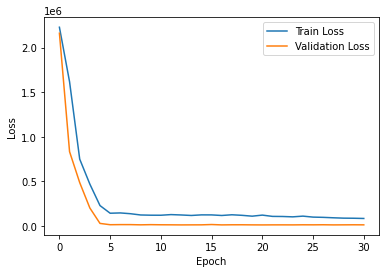

In [10]:
#BEST trained model

import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the synthetic data
df = pd.read_csv('synthetic_traffic_data.csv')

# Define feature columns and target
features = ['Lane ID', 'Time of Day', 'Day of Week', 'Weather Condition', 'Lane Width (m)', 'Road Type', 'Season/Month', 'Occasion/Event', 'Location']
target = 'Traffic Density (Vehicles)'

# Split data into features and target
X = df[features]
y = df[target]

# Handle categorical features (convert to one-hot encoding)
X = pd.get_dummies(X, columns=['Time of Day', 'Day of Week', 'Weather Condition', 'Road Type', 'Season/Month', 'Occasion/Event', 'Location'])

# Normalize feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),  # Specify input shape with Input layer
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(1)
])
# Compile the model with Adam optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Plot learning curves
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Save the model
model.save('traffic_model.keras')



In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from datetime import datetime

# Define the function to get the time of day based on input time
def get_time_of_day(time_str):
    time_obj = datetime.strptime(time_str, '%H:%M')

    early_morning_end = datetime.strptime('06:00', '%H:%M')
    morning_end = datetime.strptime('12:00', '%H:%M')
    afternoon_end = datetime.strptime('18:00', '%H:%M')
    evening_end = datetime.strptime('21:00', '%H:%M')
    
    if time_obj < early_morning_end:
        return 'Early Morning'
    elif time_obj < morning_end:
        return 'Morning'
    elif time_obj < afternoon_end:
        return 'Afternoon'
    elif time_obj < evening_end:
        return 'Evening'
    else:
        return 'Night'

# Define the function to calculate green light times based on traffic densities
def calculate_green_light_times(north_south_density, east_west_density, total_cycle_time=120, min_green_time=20, weight_factor=2):
    weighted_north_south_density = north_south_density ** weight_factor
    weighted_east_west_density = east_west_density ** weight_factor

    total_weighted_density = weighted_north_south_density + weighted_east_west_density
    green_time_north_south = (weighted_north_south_density / total_weighted_density) * total_cycle_time
    green_time_east_west = total_cycle_time - green_time_north_south

    green_time_north_south = max(green_time_north_south, min_green_time)
    green_time_east_west = max(green_time_east_west, min_green_time)

    if green_time_north_south + green_time_east_west > total_cycle_time:
        scale_factor = total_cycle_time / (green_time_north_south + green_time_east_west)
        green_time_north_south *= scale_factor
        green_time_east_west *= scale_factor

    return green_time_north_south, green_time_east_west

# Define the function to collect input and predict traffic densities
def collect_inputs_and_predict(model, scaler, X):
    no_of_lanes = 4
    L = []

    time_input = input("Enter the time of the day (HH:MM): ")
    time_of_day = get_time_of_day(time_input)

    day_of_week = input("Enter the day of week: ").capitalize()
    weather_condition = input("Enter Weather condition: ").capitalize()
    season = input("Enter the season: ").capitalize()
    event = input("Enter if any occasion/event: ").capitalize()
    location = input("Enter the Location: ").capitalize()

    for i in range(no_of_lanes):
        lane_id = int(input(f"Enter Lane ID (1-4) for lane {i+1}: "))
        lane_width = int(input(f"Enter lane width for lane {i+1}: "))
        road_type = input(f"Enter the road type for lane {i+1}: ").capitalize()

        new_data = pd.DataFrame({
            'Lane ID': [lane_id],
            'Time of Day': [time_of_day],
            'Day of Week': [day_of_week],
            'Weather Condition': [weather_condition],
            'Lane Width (m)': [lane_width],
            'Road Type': [road_type],
            'Season/Month': [season],
            'Occasion/Event': [event],
            'Location': [location]
        })

        # Convert categorical features to one-hot encoding
        new_data_encoded = pd.get_dummies(new_data, columns=['Time of Day', 'Day of Week', 'Weather Condition', 'Road Type', 'Season/Month', 'Occasion/Event', 'Location'])

        # Ensure the new data has the same columns as the training data
        missing_cols = set(X.columns) - set(new_data_encoded.columns)
        for c in missing_cols:
            new_data_encoded[c] = 0
        new_data_encoded = new_data_encoded[X.columns]

        # Normalize new data
        new_data_scaled = scaler.transform(new_data_encoded)

        # Predict the density for the lane
        new_predictions = model.predict(new_data_scaled)
        L.append(new_predictions[0][0])
    
    return L

# Define the function to adjust traffic lights based on predicted densities
def adjust_traffic_lights(predicted_densities, total_cycle_time=120, min_green_time=20, weight_factor=2):
    north_south_density = (predicted_densities[0] + predicted_densities[1]) / 2
    east_west_density = (predicted_densities[2] + predicted_densities[3]) / 2

    green_time_north_south, green_time_east_west = calculate_green_light_times(
        north_south_density, east_west_density, total_cycle_time, min_green_time, weight_factor
    )

    print(f"North-South (Lanes 1 & 2): Green light for {green_time_north_south:.2f} seconds")
    print(f"East-West (Lanes 3 & 4): Green light for {green_time_east_west:.2f} seconds")
    print("------------------------------------------------------------")


# Assuming 'model' is your trained traffic model and 'scaler' is the standard scaler used during training
# X represents the training data used for column alignment
predicted_densities = collect_inputs_and_predict(model, scaler, X)

# Adjust traffic lights based on the predicted densities
adjust_traffic_lights(predicted_densities)


Enter the time of the day (HH:MM): 21:00
Enter the day of week: saturday
Enter Weather condition: clear
Enter the season: summer
Enter if any occasion/event: none
Enter the Location: office complex
Enter Lane ID (1-4) for lane 1: 1
Enter lane width for lane 1: 47
Enter the road type for lane 1: highway
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Enter Lane ID (1-4) for lane 2: 2
Enter lane width for lane 2: 47
Enter the road type for lane 2: highway
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Enter Lane ID (1-4) for lane 3: 3
Enter lane width for lane 3: 28
Enter the road type for lane 3: city road
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Enter Lane ID (1-4) for lane 4: 4
Enter lane width for lane 4: 28
Enter the road type for lane 4: city road
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
North-South (Lanes 1 & 2): Green light for 54.25 seconds
East-West (Lanes 3 & 4): Green light for 65.75 seconds
------------------------------------------------------------


In [19]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.preprocessing import StandardScaler

# Function to get the time of day category based on the hour
def get_time_of_day_from_hour(hour):
    if 0 <= hour < 6:
        return 'Early Morning'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Function to predict traffic densities for all time blocks of the day
def predict_for_entire_day():
    Lanes = [1, 2, 3, 4]  # Lane IDs
    results = {}  # Store predicted densities for each lane and each time block
    
    Day_of_week = input("Enter the day of week: ").capitalize()
    Weather_condition = input("Enter Weather condition: ").capitalize()
    Season = input("Enter the season: ").capitalize()
    Event = input("Enter if any occasion/event: ").capitalize()
    Location = input("Enter the Location: ").capitalize()

    # Loop through all lanes
    for lane_id in Lanes:
        Lane_width = int(input(f"Enter lane width for Lane {lane_id}: "))
        Road_type = input(f"Enter the road type for Lane {lane_id}: ").capitalize()

        # Initialize an empty dictionary to store time-wise densities for the current lane
        lane_densities = {}

        # Loop through 24 hours of the day (00:00 to 23:00)
        for hour in range(24):
            time_of_day = get_time_of_day_from_hour(hour)
            new_data = pd.DataFrame({
                'Lane ID': [lane_id],
                'Time of Day': [time_of_day],
                'Day of Week': [Day_of_week],
                'Weather Condition': [Weather_condition],
                'Lane Width (m)': [Lane_width],
                'Road Type': [Road_type],
                'Season/Month': [Season],
                'Occasion/Event': [Event],
                'Location': [Location]
            })

            # Convert categorical features to one-hot encoding
            new_data_encoded = pd.get_dummies(new_data, columns=['Time of Day', 'Day of Week', 'Weather Condition', 'Road Type', 'Season/Month', 'Occasion/Event', 'Location'])

            # Ensure the new data has the same columns as the training data
            missing_cols = set(X.columns) - set(new_data_encoded.columns)
            for c in missing_cols:
                new_data_encoded[c] = 0
            new_data_encoded = new_data_encoded[X.columns]

            # Normalize new data
            new_data_scaled = scaler.transform(new_data_encoded)

            # Predict traffic density for this time block
            new_prediction = model.predict(new_data_scaled)[0][0]
            lane_densities[hour] = new_prediction  # Store predicted density for the current hour

        results[lane_id] = lane_densities  # Store all hourly predictions for the current lane

    return results

# Function to print the predicted schedule with green and yellow light timings
def print_predicted_schedule(predicted_densities):
    print("Predicted Traffic Light Schedule for the Entire Day:\n")
    
    cycle_length = 120  # Total cycle length in seconds
    yellow_time = 5    # Yellow light duration in seconds

    for hour in range(24):
        north_south_density = (predicted_densities[1][hour] + predicted_densities[2][hour]) / 2
        east_west_density = (predicted_densities[3][hour] + predicted_densities[4][hour]) / 2

        # Calculate green light times
        total_density = north_south_density + east_west_density
        green_time_ns = round(north_south_density / total_density * (cycle_length - yellow_time))
        green_time_ew = round(east_west_density / total_density * (cycle_length - yellow_time))

        print(f"{hour}:00 - Traffic Light Schedule")
        print(f"  Green for North-South (Lanes 1 & 2): {green_time_ns} seconds")
        print(f"  Yellow light delay: {yellow_time} seconds")
        print(f"  Green for East-West (Lanes 3 & 4): {green_time_ew} seconds")
        print("------------------------------------------------------------")

# Function to check if there's a significant change
def check_for_changes(predicted_density, real_time_density, threshold=250):
    return abs(real_time_density - predicted_density) > threshold

# Function to adjust traffic lights based on the comparison
def adjust_traffic_lights_if_needed(predicted_densities, real_time_densities, current_time):
    # Extract the current hour and minute from the input time
    hour = current_time.hour
    minute = current_time.minute

    north_south_density = (real_time_densities[1] + real_time_densities[2]) / 2
    east_west_density = (real_time_densities[3] + real_time_densities[4]) / 2

    predicted_north_south = (predicted_densities[1][hour] + predicted_densities[2][hour]) / 2
    predicted_east_west = (predicted_densities[3][hour] + predicted_densities[4][hour]) / 2


    # Check if there's a significant change for North-South
    if check_for_changes(predicted_north_south, north_south_density):
        green_time_ns = round(north_south_density / (north_south_density + east_west_density) * (120 - 5))
        print(f"{hour}:{minute:02d} - Change detected in North-South (Lanes 1 & 2)")
        print(f"Green light adjusted for Lanes 1 & 2: {green_time_ns} seconds green light and 5 seconds yellow light.")
    
    # Check if there's a significant change for East-West
    if check_for_changes(predicted_east_west, east_west_density):
        green_time_ew = round(east_west_density / (north_south_density + east_west_density) * (120 - 5))
        print(f"{hour}:{minute:02d} - Change detected in East-West (Lanes 3 & 4)")
        print(f"Green light adjusted for Lanes 3 & 4: {green_time_ew} seconds green light and 5 seconds yellow light.")
    
    print("------------------------------------------------------------")

# Simulate real-time data input every 10 minutes and compare with predictions
def get_real_time_inputs_and_compare(predicted_densities):
    while True:
        # Input current time and real-time density values for each lane
        current_time_input = input("Enter current time in HH:MM format: ")
        current_time = datetime.strptime(current_time_input, "%H:%M")
        
        real_time_densities = {}
        for lane_id in [1, 2, 3, 4]:
            real_time_densities[lane_id] = float(input(f"Enter real-time density for Lane {lane_id}: "))
        
        # Adjust traffic lights based on real-time data only if there's a significant change
        adjust_traffic_lights_if_needed(predicted_densities, real_time_densities, current_time)

        # Wait for the next 10-minute interval
        next_time = current_time + timedelta(minutes=10)
        print(f"Next input expected at {next_time.strftime('%H:%M')}")
        print("------------------------------------------------------------")

# Get predictions for the entire day
predicted_densities = predict_for_entire_day()

# Print the predicted schedule with green and yellow light timings
print_predicted_schedule(predicted_densities)

# Start real-time traffic simulation and comparison
get_real_time_inputs_and_compare(predicted_densities)



Enter the day of week: saturday
Enter Weather condition: clear
Enter the season: summer
Enter if any occasion/event: none
Enter the Location: office complex
Enter lane width for Lane 1: 50
Enter the road type for Lane 1: city road


C:\Users\venka\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: at least one array or dtype is required